In [15]:
import os
import sys
import pandas as pd
import requests
from igdb.wrapper import IGDBWrapper
import json
import matplotlib.pyplot as plt
sys.path.append("/Users/antonis/code/Ant-mel/legendary_game_recs/")
from preprocessing.preprocess_1_cleaning import *
from urllib.parse import quote

CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")
GRANT_TYPE = os.getenv("GRANT_TYPE")

In [19]:
no_reviews = pd.read_csv('../raw_data/no_reviews_to_fetch_from_api')
no_reviews

,title,avg_review,url,link,game_id
0,Volleyball,0.0,/games/volleyball--2/,/games/volleyball--2/,109446
1,Moonlander,0.0,/games/lunar-lander--1/,/games/lunar-lander--1/,9129
2,Paddle Battle,0.0,/games/paddle-battle--1/,/games/paddle-battle--1/,172781
3,Volly,0.0,/games/volly/,/games/volly/,130859
4,Empire,0.0,/games/empire--1/,/games/empire--1/,11518
...,...,...,...,...,...
57164,Enjoy the Diner,0.0,/games/enjoy-the-diner/,/games/enjoy-the-diner/,250232
57165,The 4 Masters of Melody Ex,0.0,/games/the-4-masters-of-melody-ex/,/games/the-4-masters-of-melody-ex/,259774
57166,Super Fighting Jam,0.0,/games/super-fighting-jam/,/games/super-fighting-jam/,257686
57167,Battle of Tarlis,0.0,/games/battle-of-tarlis/,/games/battle-of-tarlis/,259587


In [21]:
no_reviews_ids = no_reviews['game_id']
no_reviews_ids

0        109446
1          9129
2        172781
3        130859
4         11518
          ...  
57164    250232
57165    259774
57166    257686
57167    259587
57168    259738
Name: game_id, Length: 57169, dtype: int64

In [33]:
game_ids = pd.read_csv('../raw_data/all_links_with_game_id_v1').drop_duplicates()
game_ids_list = game_ids['game_id']

In [38]:
# Function that creates a list of features
def get_list_of_features(the_json):
    feature_dic = {"id":None,
        "aggregated_rating": None,
        "aggregated_rating_count": None,
        "game_engines": None,
        "game_modes": None,
        "player_perspectives": None,
        "themes": None,
        'rating': None, 
        'name': None}

    for key in the_json.keys():
        if type(the_json[key]) == list:
            for i in range(len(the_json[key])):
                value = the_json[key][i]['name']
                feature_dic.update({f'{key}': value})

        else:
            value = the_json[key]
            feature_dic.update({f'{key}': value})

    return feature_dic



# Credentials for calling the API
CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")
GRANT_TYPE = os.getenv("GRANT_TYPE")

#Generating the access token
response = requests.post(f'https://id.twitch.tv/oauth2/token?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&grant_type={GRANT_TYPE}')
response_json = response.json()
ACCESS_TOKEN = response_json['access_token']

In [39]:
#This is a wrapper from IGDB just for their API
wrapper = IGDBWrapper(CLIENT_ID, ACCESS_TOKEN)

no_data = []
list_dicts = []


#This for loop runs game titles to get the data
for game in game_ids_list[0:20]:

    try:
        the_feat = json.loads(wrapper.api_request('games',
                        f'fields aggregated_rating,aggregated_rating_count, game_engines.name, game_modes.name, multiplayer_modes, player_perspectives.name, themes.name, name, rating; where id = {game};'))

        v = get_list_of_features(the_feat[0])
        list_dicts.append(v)

    except:
        print('fail')
        no_data.append(game)

fail
fail


In [40]:
pd.DataFrame(list_dicts)

,id,aggregated_rating,aggregated_rating_count,game_engines,game_modes,player_perspectives,themes,rating,name,title
0,123757,None,None,None,Single player,None,Action,None,PilotXross,123757
1,106694,None,None,None,Single player,None,Action,None,Plague Hunter,106694
2,259874,None,None,None,None,Third person,Open world,None,The God Slayer,259874
3,211568,None,None,None,Single player,None,Action,None,Rise of Rebellion,211568
4,214912,None,None,None,Single player,Third person,Mystery,None,Penny Blood,214912
5,214496,None,None,None,Single player,Third person,Stealth,None,Snaccoon,214496
6,251065,None,None,None,Single player,Third person,Science fiction,None,Haruka: Beyond the Stars,251065
7,204112,None,None,None,None,None,None,None,Tales of the Death,204112
8,253418,None,None,None,Single player,None,None,None,Riversiders,253418
9,165229,None,None,Unreal Engine 4,Single player,First person,Action,None,ExeKiller,165229


In [114]:
game_ids_list

0         123757
1         106694
2         259874
3         211568
4         214912
           ...  
120091     40401
120092     11412
120093     11325
120094     11245
120095     11396
Name: game_id, Length: 110048, dtype: int64

In [82]:
gate = 119171

SyntaxError: invalid syntax (3559830307.py, line 1)

In [134]:
empt = []

for game in game_ids_list[50000:50010]:
    temp = json.loads(wrapper.api_request('games',
                f'fields age_ratings.rating, age_ratings.content_descriptions.category,aggregated_rating,aggregated_rating_count, game_engines.name, game_modes.name, multiplayer_modes, player_perspectives.name, themes.name, name, rating; where id = {game};'))
    
    empt.append(temp[0])
    
    

In [135]:
empt[3]

{'id': 12632,
 'age_ratings': [{'id': 22813,
   'content_descriptions': [{'id': 21738, 'category': 8},
    {'id': 21739, 'category': 15},
    {'id': 21740, 'category': 24},
    {'id': 21741, 'category': 29},
    {'id': 21742, 'category': 32}],
   'rating': 10},
  {'id': 22814,
   'content_descriptions': [{'id': 21743, 'category': 50},
    {'id': 21744, 'category': 51},
    {'id': 21745, 'category': 55}],
   'rating': 3}],
 'aggregated_rating': 69.1,
 'aggregated_rating_count': 11,
 'game_engines': [{'id': 174, 'name': 'PhyreEngine'}],
 'game_modes': [{'id': 1, 'name': 'Single player'},
  {'id': 2, 'name': 'Multiplayer'},
  {'id': 3, 'name': 'Co-operative'}],
 'multiplayer_modes': [17823],
 'name': 'Sword Art Online: Hollow Realization',
 'player_perspectives': [{'id': 2, 'name': 'Third person'}],
 'rating': 72.26666666666667,
 'themes': [{'id': 1, 'name': 'Action'}, {'id': 17, 'name': 'Fantasy'}]}

In [107]:
feature_dic2 = {}

thing = temp[0]

for i in range(len(thing)):
    value = thing['age_ratings']['category']
    feature_dic2.update({f'{key}': value})

TypeError: list indices must be integers or slices, not str

In [137]:
with open('../raw_data/json_test', 'r') as json_file:
    data = json.load(json_file)

In [141]:
data[3]

{'id': 12632,
 'age_ratings': [{'id': 22813,
   'content_descriptions': [{'id': 21738, 'category': 8},
    {'id': 21739, 'category': 15},
    {'id': 21740, 'category': 24},
    {'id': 21741, 'category': 29},
    {'id': 21742, 'category': 32}],
   'rating': 10},
  {'id': 22814,
   'content_descriptions': [{'id': 21743, 'category': 50},
    {'id': 21744, 'category': 51},
    {'id': 21745, 'category': 55}],
   'rating': 3}],
 'aggregated_rating': 69.1,
 'aggregated_rating_count': 11,
 'game_engines': [{'id': 174, 'name': 'PhyreEngine'}],
 'game_modes': [{'id': 1, 'name': 'Single player'},
  {'id': 2, 'name': 'Multiplayer'},
  {'id': 3, 'name': 'Co-operative'}],
 'multiplayer_modes': [17823],
 'name': 'Sword Art Online: Hollow Realization',
 'player_perspectives': [{'id': 2, 'name': 'Third person'}],
 'rating': 72.26666666666667,
 'themes': [{'id': 1, 'name': 'Action'}, {'id': 17, 'name': 'Fantasy'}]}

# Inital work, new work at the top

In [4]:
data = pd.read_csv('../raw_data/all_game_data_v1', low_memory=False)

In [5]:
df = cleaning_in_notebook(data)

/Users/antonis/code/Ant-mel/legendary_game_recs/preprocessing/preprocess_1_cleaning.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=pd.to_datetime(df[column])
/Users/antonis/code/Ant-mel/legendary_game_recs/preprocessing/preprocess_2_features.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupe['gen'] = None
/Users/antonis/code/Ant-mel/legendary_game_recs/preprocessing/preprocess_1_cleaning.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [6]:
#Creating a mask for the new dfs
df_mask = df['avg_review'] == 0
df_good_mask = df['avg_review'] != 0

df_no_reviews = df[df_mask]
df_with_reviews = df[df_good_mask]

(1.0, 2.0)

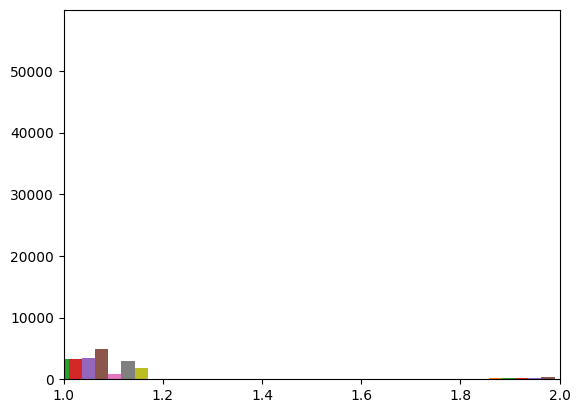

In [7]:
#Checking the dataframe WITHOUT avg_reviews
df_sorted = df_no_reviews.sort_values('release_date')

time_mask = df_sorted['release_date'] < "2023-08-01"

no_duplicates_recent_games = df_sorted[time_mask].drop_duplicates('title')

review_columsn = no_duplicates_recent_games

only_reviews = review_columsn[['ratings_one_five', 'ratings_one_zero', 
               'ratings_two_five', 'ratings_two_zero',
               'ratings_three_five', 'ratings_three_zero',
               'ratings_four_five', 'ratings_four_zero',
               'ratings_five_zero']]

plt.hist(only_reviews)
plt.xlim(1,2)

In [8]:
#Creating the list of titles without reviews
# These will be iterated over in the API
list_of_titles_without_review = review_columsn['title']
list_of_titles_without_review

106732                           Nim
106727             Mouse in the Maze
106721                      Indy 500
106718                     Wild West
106717                  Space Travel
                     ...            
1553                     Fandominion
1552               Eternal Afterlife
1562      The 4 Masters of Melody Ex
1555                      Cornucopia
1563              Super Fighting Jam
Name: title, Length: 57987, dtype: object

In [74]:
#Looking at the df WITH reviews to test the API
with_reviews_dropped_dupes = df_with_reviews.drop_duplicates('title')
titles_with_reviews = with_reviews_dropped_dupes['title']

In [250]:
titles_with_reviews

69                    Darling Duality: Winter Wish
166                                     Anger Foot
377                            Life Is Feudal: MMO
599                         The Making of Karateka
634                                 Enigma of Fear
                            ...                   
108915    Final Crisis: Terrestrial Defense Police
109040                                   Level Up!
109081                                  Sea Battle
109232                           We Are Illuminati
109755                                  Karate Cat
Name: title, Length: 36545, dtype: object

# First contact with API!!

In [6]:
url = 'https://id.twitch.tv/oauth2/token'

# Couldn't figure out how to use this yet
# params = {'client_id':CLIENT_ID, 'client_secret':CLIENT_SECRET, 'grant_type':GRANT_TYPE}

In [76]:
response = requests.post(f'https://id.twitch.tv/oauth2/token?client_id={CLIENT_ID}&client_secret={CLIENT_SECRET}&grant_type={GRANT_TYPE}')

response_status = response.status_code

response_json = response.json()

ACCESS_TOKEN = response_json['access_token']

# Testing out Endpoints

In [11]:
body = 'fields *; limit 20;'

headers = {'Client-ID':CLIENT_ID, 'Authorization':f'Bearer {ACCESS_TOKEN}', 'Body': body}

# base_url = 'https://api.igdb.com/v4'

call_response = requests.post('https://api.igdb.com/v4/games', headers=headers)

In [12]:
call_response.json()

[{'id': 1},
 {'id': 2},
 {'id': 3},
 {'id': 4},
 {'id': 5},
 {'id': 6},
 {'id': 7},
 {'id': 8},
 {'id': 9},
 {'id': 10}]

TEST RESULTS WERE A FAIL!!! 🚷

# Trying IGDB wrapper

In [77]:
wrapper = IGDBWrapper(CLIENT_ID, ACCESS_TOKEN)

The below code has the game features we are looking for

In [140]:
features = json.loads(wrapper.api_request('games', 
                    'fields aggregated_rating,aggregated_rating_count, game_engines.name, game_modes.name, multiplayer_modes, player_perspectives.name, themes.name, rating; where name = "The Sims 4: Horse Ranch";'))

In [141]:
for i in features[0].keys():
    print(i)

id
aggregated_rating
aggregated_rating_count
game_modes


In [173]:
def get_list_of_features(the_json):
    feature_dic = {"id":None,
        "aggregated_rating": None,
        "aggregated_rating_count": None,
        "game_engines": None,
        "game_modes": None,
        "player_perspectives": None,
        "themes": None, 
        'rating': None}
    
    for key in the_json.keys():
        if type(the_json[key]) == list:
            for i in range(len(the_json[key])):
                value = the_json[key][i]['name']
                feature_dic.update({f'{key}': value})
        
        else:
            value = the_json[key]
            feature_dic.update({f'{key}': value})
            
    return feature_dic

In [172]:
get_list_of_features(features[0])

{'id': 253116,
 'aggregated_rating': 70.0,
 'aggregated_rating_count': 1,
 'game_engines': None,
 'game_modes': 'Single player',
 'player_perspectives': None,
 'themes': None,
 'rating': None}

In [204]:
no_reviews = []
no_data = []
list_dicts = []

for game in list_of_titles_without_review[101:201]:
    try:
        the_feat = json.loads(wrapper.api_request('games', 
                        f'fields aggregated_rating,aggregated_rating_count, game_engines.name, game_modes.name, multiplayer_modes, player_perspectives.name, themes.name, rating; where name = "{game}";'))
        
        v = get_list_of_features(the_feat[0])
        v.update({'title':game})
        print(game)
        list_dicts.append(v)
    
    except:
        print('fail')
        no_data.append(game)
    
list_dicts


Minesweeper
Car Race
Submarine
Laguna Racer
Drag Race
Shoot Away
M-4
Futurewar
Enduro
Videocart-4: Spitfire
Videocart-18: Hangman
Blackjack / Poker / Acey-Deucey
280 Zzzap + Dodgem
Tornado Baseball / Tennis / Handball / Hockey
Computer Othello
Top Bowler
Gypsy Juggler
Clowns
Sea Wolf II
Dead Eye
Tournament Table
Night Driver
Extra Inning
Secret Base
Speed Race CL-5
Dungeon Campaign
Blackjack
Wildwood
Santa Paravia and Fiumaccio
Letter Match / Spell N Score / Crosswords
Super Wipeout
Sea Wolf / Missile
Football
Elementary math / Bingo Math
The Amazing Spider-Man Rescue
Football 2
Baseball
Red Baron / Panzer Attack
A Game of Concentration
Escape
3-D Bowling
Alto Trek
Hunt & Score
Starfleet Orion
Take the Money and Run!
Pirate Adventure
fail
Space King
fail
Alpine Skiing
Space Attack
Simon Says!
Fortress
Sky Diver
ZunZun Block
Phantom II
SOS
Dodgem
Wilderness Campaign
4 Player Bowling Alley
Straight Flush
Field Goal
Rich Man
Barrier
Galaxy Wars
Space Ship
Star Trek: Phaser Strike
Super Sp

[{'id': 252359,
  'aggregated_rating': None,
  'aggregated_rating_count': None,
  'game_engines': None,
  'game_modes': 'Multiplayer',
  'player_perspectives': 'Bird view / Isometric',
  'themes': None,
  'rating': None,
  'title': 'Minesweeper'},
 {'id': 28354,
  'aggregated_rating': None,
  'aggregated_rating_count': None,
  'game_engines': None,
  'game_modes': 'Multiplayer',
  'player_perspectives': 'Bird view / Isometric',
  'themes': 'Action',
  'rating': None,
  'title': 'Car Race'},
 {'id': 68458,
  'aggregated_rating': None,
  'aggregated_rating_count': None,
  'game_engines': None,
  'game_modes': 'Multiplayer',
  'player_perspectives': 'Side view',
  'themes': None,
  'rating': None,
  'title': 'Submarine'},
 {'id': 170525,
  'aggregated_rating': None,
  'aggregated_rating_count': None,
  'game_engines': None,
  'game_modes': None,
  'player_perspectives': None,
  'themes': None,
  'rating': None,
  'title': 'Laguna Racer'},
 {'id': 68157,
  'aggregated_rating': None,
  'agg

In [215]:
the_frame = pd.DataFrame(list_dicts)

the_frame.to_csv('../raw_data/test_api', index=False)

In [216]:
pd.read_csv('../raw_data/test_api')

,id,aggregated_rating,aggregated_rating_count,game_engines,game_modes,player_perspectives,themes,rating,title
0,252359,NaN,NaN,NaN,Multiplayer,Bird view / Isometric,NaN,NaN,Minesweeper
1,28354,NaN,NaN,NaN,Multiplayer,Bird view / Isometric,Action,NaN,Car Race
2,68458,NaN,NaN,NaN,Multiplayer,Side view,NaN,NaN,Submarine
3,170525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laguna Racer
4,68157,NaN,NaN,NaN,Single player,Side view,NaN,NaN,Drag Race
...,...,...,...,...,...,...,...,...,...
91,25297,NaN,NaN,NaN,Single player,Third person,Educational,NaN,Three Mile Island
92,62409,NaN,NaN,NaN,Multiplayer,Bird view / Isometric,NaN,NaN,Super Maze
93,25344,NaN,NaN,NaN,Single player,Third person,"4X (explore, expand, exploit, and exterminate)",NaN,Galactic Trader
94,80208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deep Scan


In [218]:
missed = pd.DataFrame(no_data)

missed.to_csv('../raw_data/missed_test', index=False)

In [219]:
pd.read_csv('../raw_data/missed_test')

,0
0,Polo
1,SF-HiSplitter
2,Bomb Bee N
3,Head on N


In [184]:
titles_with_reviews.iloc[103]

'Yeah! You Want "Those Games", Right? So Here You Go! Now, Let\'s See You Clear Them!'

In [223]:
api_call_1 = pd.read_csv('../raw_data/api_on_data_without_reviews', low_memory=False)

<Axes: >

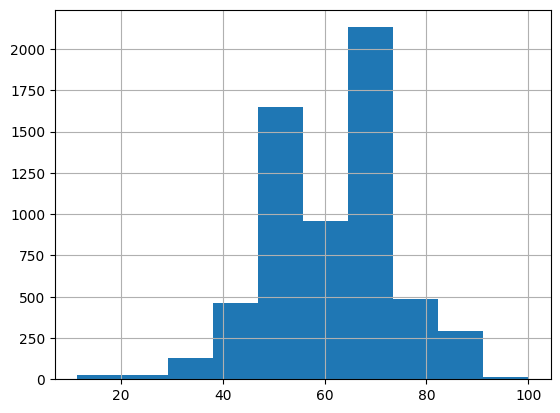

In [244]:
api_call_1['rating'].hist()

In [245]:
api_mask = api_call_1['aggregated_rating'].isna()
api_mask_rating = api_call_1['rating'].isna()

In [247]:
sorted_with_reviews = api_call_1[~api_mask_rating]
sorted_with_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6182 entries, 5 to 54144
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6182 non-null   int64  
 1   aggregated_rating        536 non-null    float64
 2   aggregated_rating_count  536 non-null    float64
 3   game_engines             385 non-null    object 
 4   game_modes               5641 non-null   object 
 5   player_perspectives      1782 non-null   object 
 6   themes                   3694 non-null   object 
 7   rating                   6182 non-null   float64
 8   title                    6182 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 483.0+ KB


In [237]:
sorted_with_agg_review = api_call_1[~api_mask].sort_values('aggregated_rating')

In [239]:
sorted_with_agg_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488 entries, 36810 to 10954
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1488 non-null   int64  
 1   aggregated_rating        1488 non-null   float64
 2   aggregated_rating_count  1488 non-null   float64
 3   game_engines             156 non-null    object 
 4   game_modes               1222 non-null   object 
 5   player_perspectives      844 non-null    object 
 6   themes                   1078 non-null   object 
 7   rating                   536 non-null    float64
 8   title                    1488 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 116.2+ KB


<Axes: >

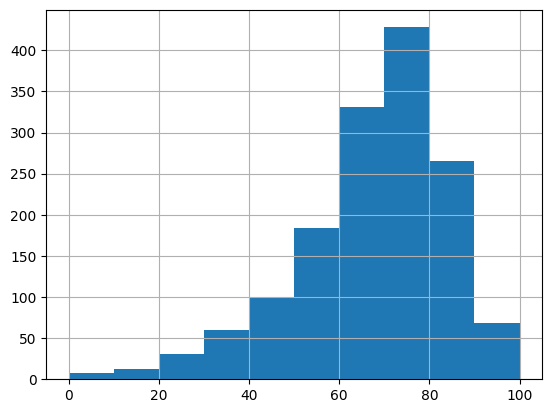

In [238]:
sorted_with_agg_review['aggregated_rating'].hist()